In [1]:
import torch
from PIL import Image
import torchvision.transforms as T
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [12]:
beta = torch.linspace(0.0001, 0.02, 10)
beta

tensor([1.0000e-04, 2.3111e-03, 4.5222e-03, 6.7333e-03, 8.9444e-03, 1.1156e-02,
        1.3367e-02, 1.5578e-02, 1.7789e-02, 2.0000e-02])

In [10]:
alpha_bar = torch.cumprod(beta, dim=0)

tensor([1.0000e-04, 2.3111e-07, 1.0451e-09, 7.0372e-12, 6.2944e-14, 7.0218e-16,
        9.3858e-18, 1.4621e-19, 2.6009e-21, 5.2018e-23])

In [18]:
torch.gather(beta,dim=0, index = torch.LongTensor([0,1,2,3])) ==  beta[:4]

tensor([True, True, True, True])

In [21]:
beta[:0]

tensor([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


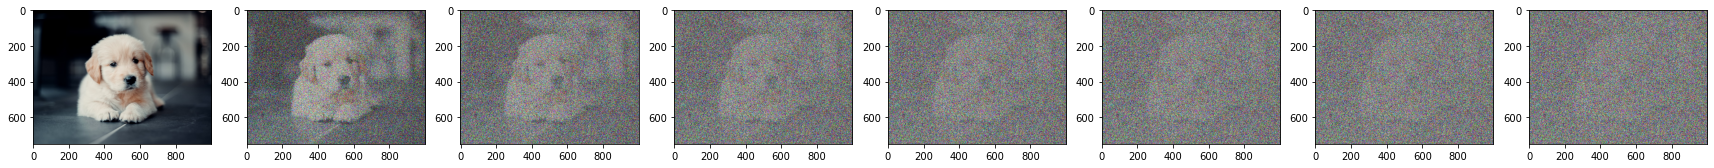

In [41]:
class ForwardNoise:
    def __init__(self, n_step):
        
        self.n_step = n_step
        self.beta = torch.linspace(0.0001, 0.02, n_step)

    def forward(self, x):
        eps = torch.randn_like(x) 
        x_t = [x]
        for t in range(self.n_step):
            mean = (1 - self.beta[t])**(0.5) * x_t[t]
            var = self.beta[t]
            x_t.append(mean + eps)
        return(x_t)
    
    def visualize(self, x):
        x_t = self.forward(x)
        fig, ax = plt.subplots(1, self.n_step, figsize=(30, 10))
        for t in range(self.n_step):
            ax[t].imshow(x_t[t].permute(1, 2, 0))


noise = ForwardNoise(n_step=8)
noise.visualize(tensor_img)

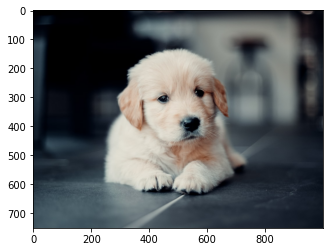

In [35]:
img = Image.open("dog.jpeg")
transform = T.ToTensor()
tensor_img = transform(img)
plt.imshow(tensor_img.numpy().transpose((1, 2, 0)))

In [36]:
list_x = noise.forward(tensor_img)
len(list_x), list_x[0].shape, torch.permute(list_x[0], (2,1,0)).shape

(6, torch.Size([3, 750, 1000]), torch.Size([1000, 750, 3]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


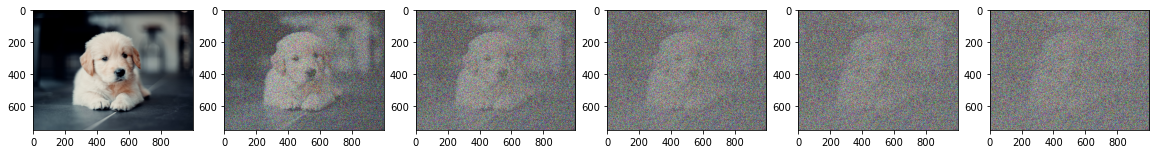

In [38]:
fig, ax = plt.subplots(1,6,figsize=(30, 10))
for t in range(6):
    ax[t].imshow(list_x[t].permute(1,2,0))

#plt.imshow(list_x[50].permute(1, 2, 0))